In [1]:
from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.layers import Dense, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.models import Sequential
import matplotlib.pylab as plt

Using TensorFlow backend.


In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 1s 0us/step


In [3]:
print("Shape of x_train:", x_train.shape)
print("Size of train set:", x_train.shape[0])
print("Size of test set:", x_test.shape[0])

Shape of x_train: (60000, 28, 28)
Size of train set: 60000
Size of test set: 10000


7


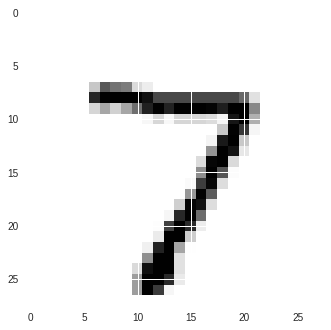

In [4]:
plt.imshow(x_test[0].reshape(28, 28))
print(y_test[0])

In [0]:
n_x = 28
n_y = 28

In [0]:
#(# of training examples, width, height, channels)
x_train = x_train.reshape(x_train.shape[0], n_x, n_y, 1)
x_test = x_test.reshape(x_test.shape[0], n_x, n_y, 1)

In [0]:
x_train = x_train.astype("float32")
x_test = x_test.astype("float32")
x_train /= 255
x_test /= 255

In [0]:
num_classes = 10
batch_size = 128
epochs = 10

In [0]:
y_train = keras.utils.to_categorical(y_train, num_classes = 10)
y_test = keras.utils.to_categorical(y_test, num_classes = 10)

In [0]:
input_shape = (n_x, n_y, 1)

In [0]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(5, 5), strides=(1, 1),
                 activation='relu',
                 input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Conv2D(64, (5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(1000, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

In [0]:
model.compile(loss = keras.losses.categorical_crossentropy,
             optimizer = keras.optimizers.SGD(lr = 0.01),
              metrics = ['accuracy'])

In [0]:
class AccuracyHistory(keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.acc = []
        self.val_acc = []

    def on_epoch_end(self, batch, logs={}):
        self.acc.append(logs.get('acc'))
        self.val_acc.append(logs.get('val_acc'))

history = AccuracyHistory()

In [14]:
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)
model.fit(x_train, y_train,
         batch_size = batch_size,
         epochs = epochs,
         verbose = 1,
         validation_data = (x_test, y_test),
         callbacks = [history])


(60000, 28, 28, 1) (10000, 28, 28, 1) (60000, 10) (10000, 10)
Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 9s 153us/step - loss: 1.1176 - acc: 0.7165 - val_loss: 0.3080 - val_acc: 0.9092
Epoch 2/10
60000/60000 [==============================] - 7s 114us/step - loss: 0.2655 - acc: 0.9211 - val_loss: 0.1957 - val_acc: 0.9418
Epoch 3/10
60000/60000 [==============================] - 7s 116us/step - loss: 0.1859 - acc: 0.9448 - val_loss: 0.1462 - val_acc: 0.9584
Epoch 4/10
60000/60000 [==============================] - 7s 115us/step - loss: 0.1461 - acc: 0.9572 - val_loss: 0.1378 - val_acc: 0.9578
Epoch 5/10
60000/60000 [==============================] - 7s 115us/step - loss: 0.1212 - acc: 0.9637 - val_loss: 0.1087 - val_acc: 0.9671
Epoch 6/10
60000/60000 [==============================] - 7s 113us/step - loss: 0.1041 - acc: 0.9698 - val_loss: 0.0855 - val_acc: 0.9745
Epoch 7/10
60000/60000 [==============================] - 7s

In [0]:
score = model.evaluate(x_test, y_test, verbose = 0)

In [16]:
score

[0.06309512259047478, 0.9815]

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
[6.1718060e-07 5.0719959e-06 3.5335226e-05 5.3551447e-02 5.2206311e-10
 9.4639021e-01 7.0044756e-08 3.4072525e-06 7.0185783e-06 6.7707888e-06]


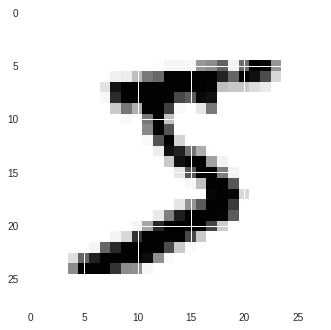

In [17]:
plt.imshow(x_train[0].reshape(28, 28))
print(y_train[0])
print(model.predict(x_train)[0])

[0.7165333333333334, 0.9211333333015442, 0.9448000000317891, 0.9571833333651225, 0.9636999999682109, 0.9697833333015442, 0.9724166666984558, 0.9750500000317891, 0.9773333333333334, 0.9789000000317891]
[0.9092, 0.9418, 0.9584, 0.9578, 0.9671, 0.9745, 0.9756, 0.9784, 0.9778, 0.9815]


Text(0,0.5,'Accuracy')

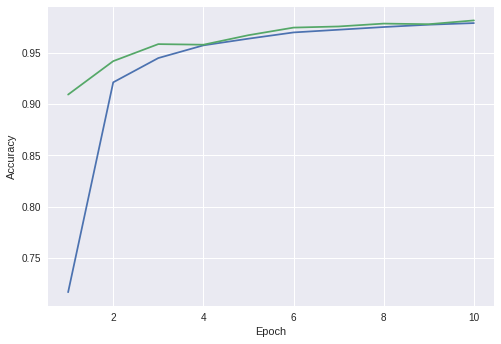

In [18]:
print(history.acc)
print(history.val_acc)
plt.plot(range(1, 11), history.acc)
plt.plot(range(1, 11), history.val_acc)
plt.xlabel('Epoch')
plt.ylabel('Accuracy')